In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

## Загрузка данных

In [ ]:
df = pd.read_csv("payments_training.tsv", sep='\t', names=["id", "date", "amount", "text", "category"])
df.head(10)

,id,date,amount,text,category
0,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
4,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
5,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING
6,7,07.11.2024,"4900,00",Оплата за Мицеллярная вода Чистая Линия Цветоч...,NON_FOOD_GOODS
7,8,07.11.2024,"3250,00",Оплата за Стиральные порошки по счету 19434127...,NON_FOOD_GOODS
8,9,07.11.2024,"5000,00",Оплата по договору №Е01368 от 03 августа 2027г...,FOOD_GOODS
9,10,07.11.2024,1840000.00,Оплата по договору процентного займа б/н от 21...,LOAN


In [ ]:
df.shape

(500, 5)

### EDA (payments_training.tsv)

In [ ]:
file_path = 'payments_training.tsv'
data = pd.read_csv(file_path, sep='\t')

data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   1                                                                                499 non-null    int64 
 1   07.11.2024                                                                       499 non-null    object
 2   15300.00                                                                         499 non-null    object
 3   За участие в конференции в г. Майкоп по договору 88.367840-ДВ от 11 апреля 2026  499 non-null    object
 4   SERVICE                                                                          499 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


(   1  07.11.2024      15300.00  \
 0  2  07.11.2024      40200,00   
 1  3  07.11.2024       1440-00   
 2  4  07.11.2024  240000000-00   
 3  5  07.11.2024    1360000.00   
 4  6  07.11.2024    1820000,00   
 
   За участие в конференции в г. Майкоп по договору 88.367840-ДВ от 11 апреля 2026  \
 0  За оказание услуг по договору №79-02726В от 01...                                
 1  Оплата за Порошок стиральный Ariel Color autom...                                
 2  Возврат денежных средств по договору займа №04...                                
 3  Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...                                
 4  Оплата по дог.финансовой аренды №Б00358 от 30....                                
 
           SERVICE  
 0         SERVICE  
 1  NON_FOOD_GOODS  
 2            LOAN  
 3  NOT_CLASSIFIED  
 4         LEASING  ,
 None,
                 1
 count  499.000000
 mean   251.000000
 std    144.193157
 min      2.000000
 25%    126.500000
 50%    251.000000
 75

<ipython-input-188-5f3849fe36cf>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='AmountCleaned', data=data, palette='Set2')


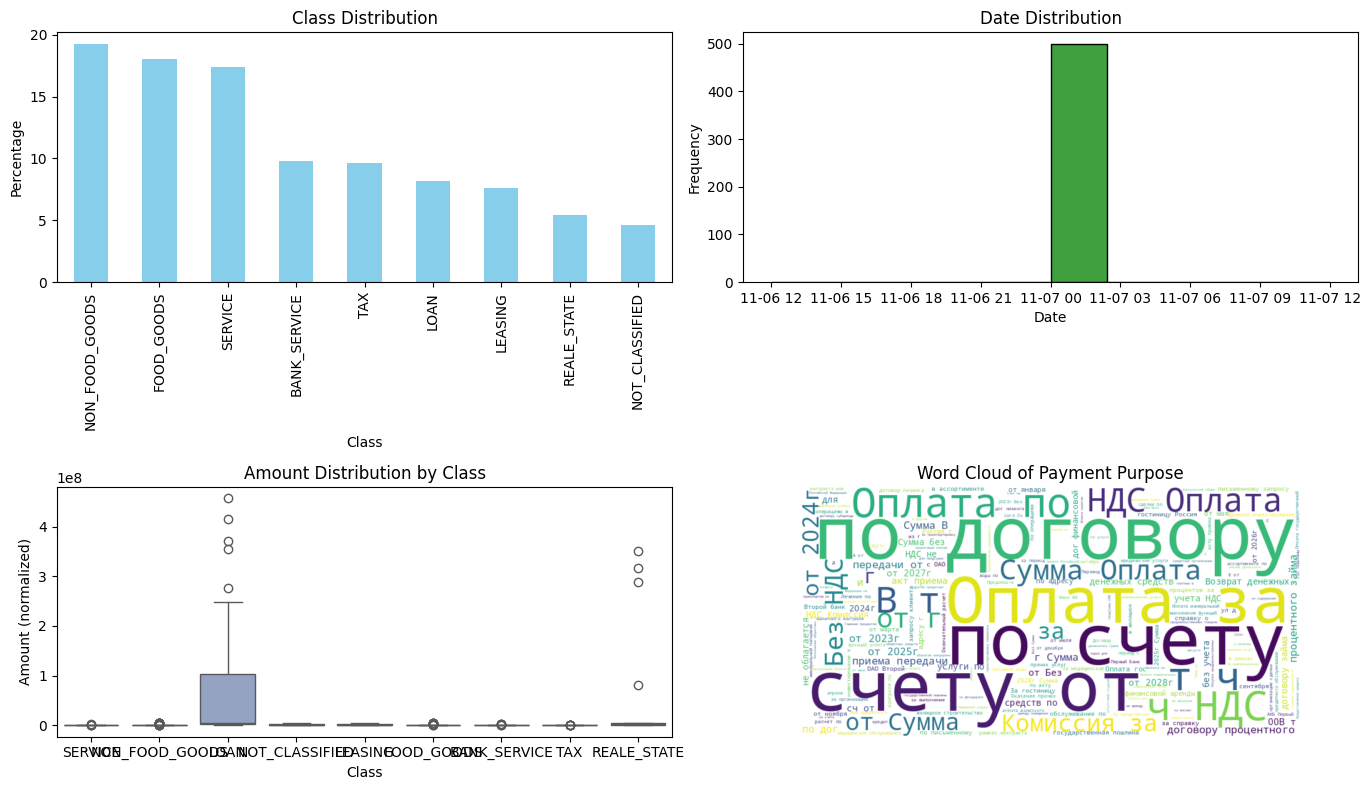

(       AmountCleaned  PurposeLength
 count   4.990000e+02     499.000000
 mean    9.181354e+06      84.809619
 std     4.957887e+07      36.166863
 min     5.100000e+02      10.000000
 25%     3.325000e+03      60.000000
 50%     1.730000e+04      95.000000
 75%     1.420000e+06     110.000000
 max     4.570000e+08     151.000000,
 Class
 NON_FOOD_GOODS    19.238477
 FOOD_GOODS        18.036072
 SERVICE           17.434870
 BANK_SERVICE       9.819639
 TAX                9.619238
 LOAN               8.216433
 LEASING            7.615230
 REALE_STATE        5.410822
 NOT_CLASSIFIED     4.609218
 Name: proportion, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Renaming columns for better clarity
data.columns = ['Index', 'Date', 'Amount', 'PaymentPurpose', 'Class']

# 1. Overview of class distribution
class_distribution = data['Class'].value_counts(normalize=True) * 100

# 2. Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# 3. Normalize 'Amount' column
def clean_amount(amount):
    if not isinstance(amount, str):
        return amount
    # Replace commas and non-numeric characters, then convert to float
    cleaned = amount.replace(',', '.').replace('-', '.').replace(' ', '').split('.')[0]
    try:
        return float(cleaned)
    except ValueError:
        return None

data['AmountCleaned'] = data['Amount'].apply(clean_amount)

# 4. Length of 'PaymentPurpose' and word frequency
data['PurposeLength'] = data['PaymentPurpose'].str.len()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['PaymentPurpose']))

# Visualization
plt.figure(figsize=(14, 8))

# Class distribution
plt.subplot(2, 2, 1)
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Date distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Date'].dropna(), kde=False, bins=10, color='green')
plt.title('Date Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Amount statistics
plt.subplot(2, 2, 3)
sns.boxplot(x='Class', y='AmountCleaned', data=data, palette='Set2')
plt.title('Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount (normalized)')

# Wordcloud for Payment Purpose
plt.subplot(2, 2, 4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Payment Purpose')

plt.tight_layout()
plt.show()

# Output key statistics
data[['AmountCleaned', 'PurposeLength']].describe(), class_distribution


### EDA (payments_main.tsv)

In [ ]:
df_main = pd.read_csv("payments_main.tsv", sep='\t', names=["id", "date", "amount", "text"])
df_main.head(3)

,id,date,amount,text
0,1,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г
1,2,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...
2,3,07.11.2024,4710-00,Оплата штрафа


In [ ]:
df['date'].value_counts()

,count
date,
07.11.2024,25000


## Обработка датасета

In [ ]:
df.head(10)

,id,date,amount,text,category
0,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
4,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
5,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING
6,7,07.11.2024,"4900,00",Оплата за Мицеллярная вода Чистая Линия Цветоч...,NON_FOOD_GOODS
7,8,07.11.2024,"3250,00",Оплата за Стиральные порошки по счету 19434127...,NON_FOOD_GOODS
8,9,07.11.2024,"5000,00",Оплата по договору №Е01368 от 03 августа 2027г...,FOOD_GOODS
9,10,07.11.2024,1840000.00,Оплата по договору процентного займа б/н от 21...,LOAN


### Парсер суммы (amount)

In [ ]:
def parse_amount(amount):
    if not isinstance(amount, str):
        return None

    amount = amount.replace(" ", "")
    amount = amount.replace("-", ".")


    if ',' in amount and '.' in amount:
        # Mixed format (e.g., 14.000,00 or 14,000.00)
        if amount.index(',') > amount.index('.'):
            # Format like 14.000,00 (dot as thousand separator, comma as decimal separator)
            amount = amount.replace('.', '').replace(',', '.')
        else:
            # Format like 14,000.00 (comma as thousand separator, dot as decimal separator)
            amount = amount.replace(',', '')
    elif ',' in amount:
        if amount.index(',') < len(amount)-3:
            amount = amount.replace(',', '')
        else:
            amount = amount.replace(',', '.')
    elif '.' in amount:
        # Format like 14.000 or 14000.00 (dot as thousand separator or decimal point)
        amount = re.sub(r'\.(?=\d{3}(?!\d))', '', amount)  # Remove dots used as thousand separator

    # Convert to float
    try:
        return float(amount)
    except ValueError:
        return None

# Test the function with various formats
# test_amounts = ["14.000,00", "14,000.00", "14000", "14 000,50", "14-000.00", "14000-50", "1.400", "14,500", "14.500", "14.50"]
# parsed_amounts = [parse_amount(amt) for amt in test_amounts]

# print(test_amounts)
# print(parsed_amounts)

In [ ]:
try:
    df['amount'] = df['amount'].apply(parse_amount)
except:
    pass
df.head()

,id,date,amount,text,category
0,1,07.11.2024,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,07.11.2024,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,07.11.2024,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,07.11.2024,240000000.0,Возврат денежных средств по договору займа №04...,LOAN
4,5,07.11.2024,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED


### Парсер формата даты (date)

In [ ]:
type(df['date'][0])

str

In [ ]:
def parse_date(date_str):
    formats = ["%d.%m.%Y", "%d-%m-%y", "%Y/%m/%d", "%d/%m/%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Не удалось обработать дату: {date_str}")

In [ ]:
try:
    df['date'] = df['date'].apply(parse_date)
except:
    pass
df.head()

,id,date,amount,text,category
0,1,2024-11-07,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,2024-11-07,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,2024-11-07,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,2024-11-07,240000000.0,Возврат денежных средств по договору займа №04...,LOAN
4,5,2024-11-07,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED


In [ ]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Парсер описания платежа (text)

In [ ]:
def clean_meta_info(text):
    # Преобразовать в нижний регистр
    text = text.lower()

    # Удалить номера договоров: "№452", "№E01368" и подобное
    text = re.sub(r"№\S+", " ", text)
    # Удалить даты в форматах: "17.03.2024", "17-03-24", "17/03/2024", "17.03.2024г", "01/01/2024г"
    text = re.sub(r"\d{1,2}[-./]\d{1,2}[-./]\d{2,4}\s?г?\.?", " ", text)
    # Удалить год в формате: "2024г"
    text = re.sub(r"\b\d{4}\s?г\.?\b", " ", text)
    # Удалить названия месяцев
    text = re.sub(r'\b(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\b', ' ', text)
    # Удалить суммы: "100 000.50", "2400000,00", "2400000.00", "100000-50"
    text = re.sub(r"\b\d{1,3}([ .,-]?\d{3})*(\.\d+|,\d+|-?\d+)?\b", " ", text)
    # Удалить символы валют
    text = re.sub(r'\b(?:₽|доллар(?:ов|а)?|USD|RUB|руб(?:.|ль|ля|лей)?)\b', ' ', text, flags=re.IGNORECASE)

    # Удалить служебные слова без информации: "на сумму", "от", "в т.ч."
    text = re.sub(r"\b(?:сумма|на сумму|от|и т\.д\.|в т\.ч\.?|в том числе|г\.)\b", " ", text, flags=re.IGNORECASE)


    # Удалить отдельно стоящие дефисы
    text = re.sub(r'-+', '-', text)
    # Удалить процентные знаки
    text = re.sub(r'%', ' ', text)
    # Удалить скобки
    text = re.sub(r'[()]', ' ', text)
    # Удалить лишние запятые
    text = re.sub(r"\s{2,}", " ", text).strip()

    text = text.replace(".", " ")
    text = text.replace("/", " ")

    # Удалить отдельно стоящие дефисы
    text = re.sub(r'(?<!\w)-(?!\w)|-+(?=\s|$)', '', text)
    # Удалить слова короче 3 символов
    text = re.sub(r'\s+\w{1,2}\s+', ' ', text)

    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text)

    return text

# Пример текста
text = "Оплата по договору №452 от 01/01/2024г на сумму 100000-50. Ростов-на-Дону... г- Майкоп"
print(clean_meta_info(text))

оплата договору ростов-на-дону майкоп


In [ ]:
df['cleaned_text'] = df['text'].apply(clean_meta_info)

df.head(20)

,id,date,amount,text,category,cleaned_text
0,1,07.11.2024,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE,за участие конференции г майкоп договору -дв
1,2,07.11.2024,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE,за оказание услуг договору
2,3,07.11.2024,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS,оплата порошок стиральный ariel color automat ...
3,4,07.11.2024,240000000.0,Возврат денежных средств по договору займа №04...,LOAN,возврат денежных средств договору займа без ндс
4,5,07.11.2024,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED,"оплата дог , согл оплата сброс загрязняющих ве..."
5,6,07.11.2024,1820000.0,Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING,"оплата дог финансовой аренды , акт приема-пере..."
6,7,07.11.2024,4900.0,Оплата за Мицеллярная вода Чистая Линия Цветоч...,NON_FOOD_GOODS,оплата мицеллярная вода чистая линия цветочная...
7,8,07.11.2024,3250.0,Оплата за Стиральные порошки по счету 19434127...,NON_FOOD_GOODS,"оплата стиральные порошки счету ,"
8,9,07.11.2024,5000.0,Оплата по договору №Е01368 от 03 августа 2027г...,FOOD_GOODS,"оплата договору , счету мясные деликатесы , ндс"
9,10,07.11.2024,1840000.0,Оплата по договору процентного займа б/н от 21...,LOAN,оплата договору процентного займа н без ндс


## Удаление стоп-слов и лемматизация

In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 62.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=95a3a44c35f80db8b609bb1341b2f591bd642a8a02d91fe39b069245972a7d36
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if len(token) < 3:
            continue
        if token[0] == '-' or token[-1] == '-':
            continue
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [ ]:
df['preprocessed_text'] = df.apply(lambda row: preprocess(row['cleaned_text'], punctuation_marks, stop_words, morph), axis=1)
df.head(10)

,id,date,amount,text,category,cleaned_text,preprocessed_text
0,1,07.11.2024,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE,за участие конференции г майкоп договору -дв,"[участие, конференция, майкоп, договор]"
1,2,07.11.2024,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE,за оказание услуг договору,"[оказание, услуга, договор]"
2,3,07.11.2024,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS,оплата порошок стиральный ariel color automat ...,"[оплата, порошок, стиральный, ariel, color, au..."
3,4,07.11.2024,240000000.0,Возврат денежных средств по договору займа №04...,LOAN,возврат денежных средств договору займа без ндс,"[возврат, денежный, средство, договор, заём, ндс]"
4,5,07.11.2024,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED,"оплата дог , согл оплата сброс загрязняющих ве...","[оплата, дог, соглый, оплата, сброс, загрязнят..."
5,6,07.11.2024,1820000.0,Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING,"оплата дог финансовой аренды , акт приема-пере...","[оплата, дог, финансовый, аренда, акт, приём-п..."
6,7,07.11.2024,4900.0,Оплата за Мицеллярная вода Чистая Линия Цветоч...,NON_FOOD_GOODS,оплата мицеллярная вода чистая линия цветочная...,"[оплата, мицеллярный, вода, чистый, линия, цве..."
7,8,07.11.2024,3250.0,Оплата за Стиральные порошки по счету 19434127...,NON_FOOD_GOODS,"оплата стиральные порошки счету ,","[оплата, стиральный, порошок, счёт]"
8,9,07.11.2024,5000.0,Оплата по договору №Е01368 от 03 августа 2027г...,FOOD_GOODS,"оплата договору , счету мясные деликатесы , ндс","[оплата, договор, счёт, мясной, деликатес, ндс]"
9,10,07.11.2024,1840000.0,Оплата по договору процентного займа б/н от 21...,LOAN,оплата договору процентного займа н без ндс,"[оплата, договор, процентный, заём, ндс]"


Проанализировав EDA payments_main датасета, пришли к выводу, что столбец date не информативен. Поэтому его добавлять не будем

In [ ]:
preprocessed_df = df[['id', 'amount', 'preprocessed_text', 'category']]
preprocessed_df.head(20)

,id,amount,preprocessed_text,category
0,1,15300.0,"[участие, конференция, майкоп, договор]",SERVICE
1,2,40200.0,"[оказание, услуга, договор]",SERVICE
2,3,1440.0,"[оплата, порошок, стиральный, ariel, color, au...",NON_FOOD_GOODS
3,4,240000000.0,"[возврат, денежный, средство, договор, заём, ндс]",LOAN
4,5,1360000.0,"[оплата, дог, соглый, оплата, сброс, загрязнят...",NOT_CLASSIFIED
5,6,1820000.0,"[оплата, дог, финансовый, аренда, акт, приём-п...",LEASING
6,7,4900.0,"[оплата, мицеллярный, вода, чистый, линия, цве...",NON_FOOD_GOODS
7,8,3250.0,"[оплата, стиральный, порошок, счёт]",NON_FOOD_GOODS
8,9,5000.0,"[оплата, договор, счёт, мясной, деликатес, ндс]",FOOD_GOODS
9,10,1840000.0,"[оплата, договор, процентный, заём, ндс]",LOAN


In [ ]:
texts = [" ".join(text) for text in preprocessed_df['preprocessed_text']]
preprocessed_df['preprocessed_text'] = texts

In [ ]:
preprocessed_df.head(50)

,id,amount,preprocessed_text,category
0,1,15300.0,участие конференция майкоп договор,SERVICE
1,2,40200.0,оказание услуга договор,SERVICE
2,3,1440.0,оплата порошок стиральный ariel color automat ...,NON_FOOD_GOODS
3,4,240000000.0,возврат денежный средство договор заём ндс,LOAN
4,5,1360000.0,оплата дог соглый оплата сброс загрязнять веще...,NOT_CLASSIFIED
5,6,1820000.0,оплата дог финансовый аренда акт приём-передач...,LEASING
6,7,4900.0,оплата мицеллярный вода чистый линия цветочный...,NON_FOOD_GOODS
7,8,3250.0,оплата стиральный порошок счёт,NON_FOOD_GOODS
8,9,5000.0,оплата договор счёт мясной деликатес ндс,FOOD_GOODS
9,10,1840000.0,оплата договор процентный заём ндс,LOAN


In [ ]:
preprocessed_df.to_csv('preprocessed_training.tsv', sep='\t')